<a href="https://colab.research.google.com/github/AyanBhardwaj06/Ayan_projects/blob/main/Data-Driven%20Market%20Entry%20Strategy%20for%20EdTech%20in.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
from google.colab import files



DATA_PATH = "/content/JEE_Dropout_After_Class_12.csv"

df = pd.read_csv(DATA_PATH)

# Map Urban → Tier-1; Semi-Urban/Rural → Tier-2/3
tier_map = {"Urban": "Tier-1", "Semi-Urban": "Tier-2/3", "Rural": "Tier-2/3"}
df["tier_bucket"] = df["location_type"].map(tier_map)

print(df.shape)
df.head(10)


(5000, 16)


,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout,tier_bucket
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1,Tier-1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0,Tier-1
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1,Tier-2/3
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0,Tier-2/3
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0,Tier-2/3
5,68.72,45.61,58.75,State,79.28,1,Local,4.5,Mid,Graduate,Semi-Urban,Low,No,Yes,0,Tier-2/3
6,94.11,82.78,80.01,CBSE,76.31,1,Local,3.7,Mid,Upto 10th,Semi-Urban,Medium,No,Yes,0,Tier-2/3
7,82.74,73.80,58.62,CBSE,77.15,1,NaN,2.2,High,12th,Urban,Low,No,Yes,0,Tier-1
8,65.43,54.25,57.83,ICSE,71.11,1,Local,5.7,Mid,Upto 10th,Semi-Urban,Low,No,Yes,0,Tier-2/3
9,79.60,63.74,77.82,State,94.96,2,NaN,2.7,Mid,12th,Rural,High,Yes,No,0,Tier-2/3


In [ ]:
# --- Cell 2: Nulls & basic info (sanity checks) ---
print(df.isnull().sum().sort_values(ascending=False))

# Basic distributions to understand scale
print("\nTier distribution:\n", df["tier_bucket"].value_counts())
print("\nIncome distribution:\n", df["family_income"].value_counts())
print("\nParent education distribution:\n", df["parent_education"].value_counts())


coaching_institute      1209
jee_main_score             0
mock_test_score_avg        0
jee_advanced_score         0
school_board               0
class_12_percent           0
attempt_count              0
daily_study_hours          0
family_income              0
parent_education           0
location_type              0
peer_pressure_level        0
mental_health_issues       0
admission_taken            0
dropout                    0
tier_bucket                0
dtype: int64

Tier distribution:
 tier_bucket
Tier-2/3    3349
Tier-1      1651
Name: count, dtype: int64

Income distribution:
 family_income
Low     1679
High    1663
Mid     1658
Name: count, dtype: int64

Parent education distribution:
 parent_education
Upto 10th    1288
PG           1245
12th         1243
Graduate     1224
Name: count, dtype: int64


In [ ]:
# --- Cell 3: Dropout rate tables for key cuts ---
dropout_by_tier = (
    df.groupby("tier_bucket")["dropout"].mean().rename("dropout_rate").reset_index()
)
dropout_by_income = (
    df.groupby(["tier_bucket","family_income"])["dropout"].mean()
      .rename("dropout_rate").reset_index()
)
dropout_by_parentedu = (
    df.groupby(["tier_bucket","parent_education"])["dropout"].mean()
      .rename("dropout_rate").reset_index()
)

print("Dropout by Tier:\n", dropout_by_tier, "\n")
print("Dropout by Tier x Income:\n", dropout_by_income.head(10), "\n")
print("Dropout by Tier x Parent Education:\n", dropout_by_parentedu.head(10))


Dropout by Tier:
   tier_bucket  dropout_rate
0      Tier-1      0.223501
1    Tier-2/3      0.199164 

Dropout by Tier x Income:
   tier_bucket family_income  dropout_rate
0      Tier-1          High      0.067395
1      Tier-1           Low      0.539543
2      Tier-1           Mid      0.046904
3    Tier-2/3          High      0.034111
4    Tier-2/3           Low      0.527027
5    Tier-2/3           Mid      0.039111 

Dropout by Tier x Parent Education:
   tier_bucket parent_education  dropout_rate
0      Tier-1             12th      0.221429
1      Tier-1         Graduate      0.223058
2      Tier-1               PG      0.211055
3      Tier-1        Upto 10th      0.237327
4    Tier-2/3             12th      0.208991
5    Tier-2/3         Graduate      0.181818
6    Tier-2/3               PG      0.221960
7    Tier-2/3        Upto 10th      0.183841


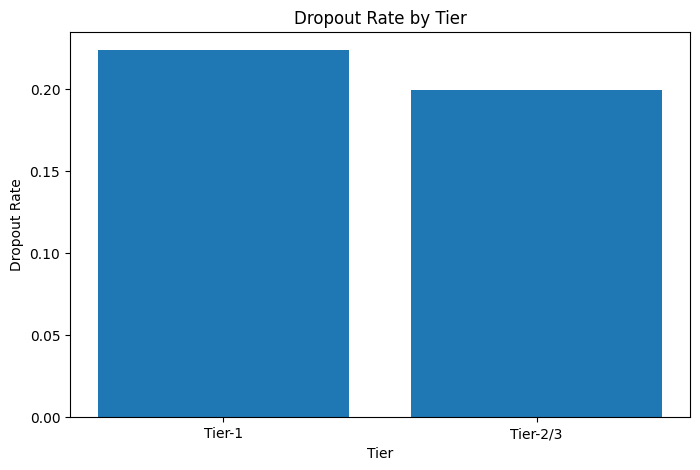

In [ ]:
# --- Cell 4: Bar chart - Dropout by Tier ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(dropout_by_tier["tier_bucket"], dropout_by_tier["dropout_rate"])
plt.title("Dropout Rate by Tier")
plt.xlabel("Tier")
plt.ylabel("Dropout Rate")
plt.show()


<Figure size 900x500 with 0 Axes>

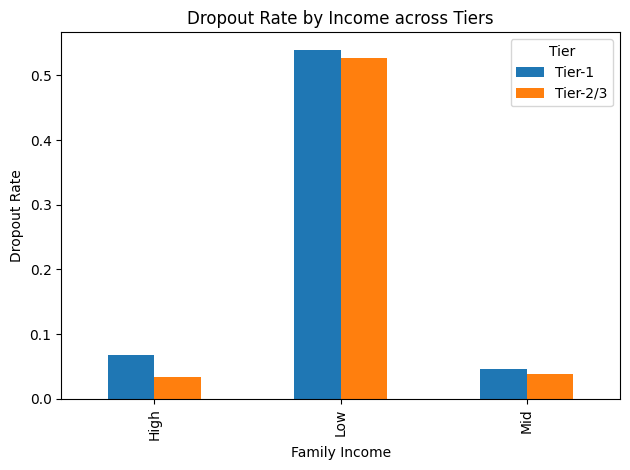

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# --- Cell 5: Grouped bar - Dropout by Income across Tiers ---
import matplotlib.pyplot as plt

pivot_income = dropout_by_income.pivot(index="family_income",
                                       columns="tier_bucket",
                                       values="dropout_rate").fillna(0)

plt.figure(figsize=(9,5))
pivot_income.plot(kind="bar")
plt.title("Dropout Rate by Income across Tiers")
plt.xlabel("Family Income")
plt.ylabel("Dropout Rate")
plt.legend(title="Tier")
plt.tight_layout()
plt.show()
plt.savefig("dropout_tier.png", dpi=300, bbox_inches="tight")
files.download("dropout_tier.png")


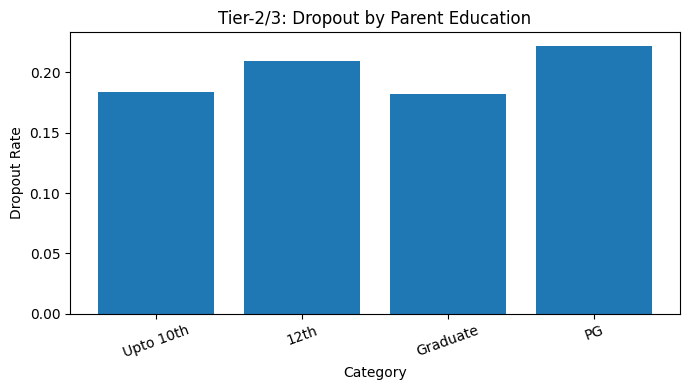

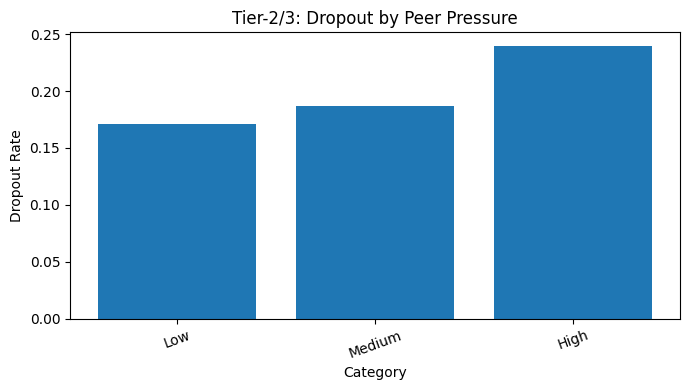

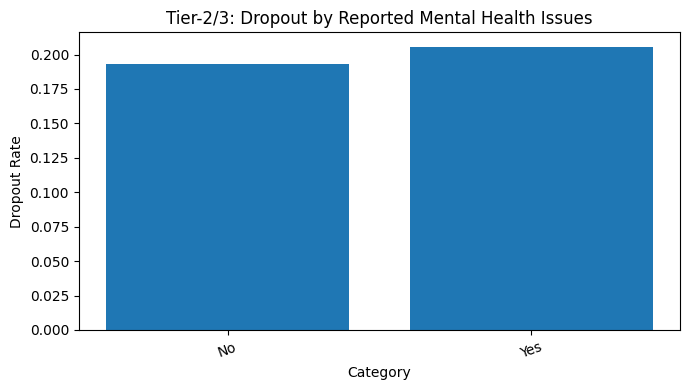

/tmp/ipython-input-972968027.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_rates = t23.groupby("hours_bin")["dropout"].mean()


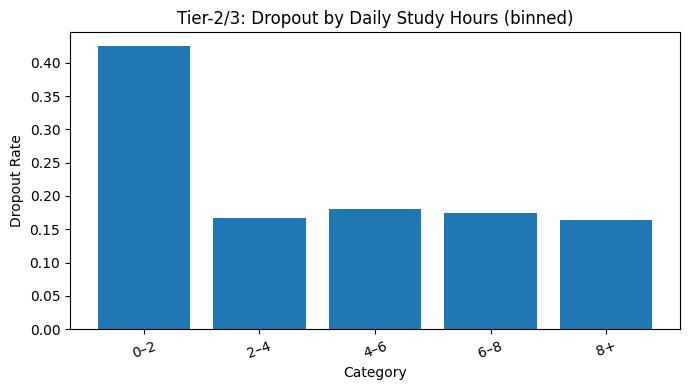

In [ ]:
# --- NEW Cell 5B: Tier-2/3 dropout reasons (bar charts) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure tier bucket exists
if "tier_bucket" not in df.columns:
    tier_map = {"Urban":"Tier-1","Semi-Urban":"Tier-2/3","Rural":"Tier-2/3"}
    df["tier_bucket"] = df["location_type"].map(tier_map)

t23 = df[df["tier_bucket"]=="Tier-2/3"].copy()

# Helper: plot a simple bar from a Series (category -> rate)
def plot_rate_bar(title, rates):
    plt.figure(figsize=(7,4))
    plt.bar(rates.index.astype(str), rates.values)
    plt.title(title)
    plt.xlabel("Category")
    plt.ylabel("Dropout Rate")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

# 1) Parent education (ordered)
parent_order = ["Upto 10th","12th","Graduate","PG"]
p_rates = (t23.groupby("parent_education")["dropout"].mean()).reindex(parent_order)
plot_rate_bar("Tier-2/3: Dropout by Parent Education", p_rates)

# 2) Peer pressure
peer_order = ["Low","Medium","High"]
peer_rates = (t23.groupby("peer_pressure_level")["dropout"].mean()).reindex(peer_order)
plot_rate_bar("Tier-2/3: Dropout by Peer Pressure", peer_rates)

# 3) Mental health (Yes/No)
mh_order = ["No","Yes"]
mh_rates = (t23.groupby("mental_health_issues")["dropout"].mean()).reindex(mh_order)
plot_rate_bar("Tier-2/3: Dropout by Reported Mental Health Issues", mh_rates)

# 4) Study-hours bins
bins = [0,2,4,6,8,24]
labels = ["0–2","2–4","4–6","6–8","8+"]
t23["hours_bin"] = pd.cut(t23["daily_study_hours"], bins=bins, labels=labels, include_lowest=True, right=False)
hours_rates = t23.groupby("hours_bin")["dropout"].mean()
plot_rate_bar("Tier-2/3: Dropout by Daily Study Hours (binned)", hours_rates)


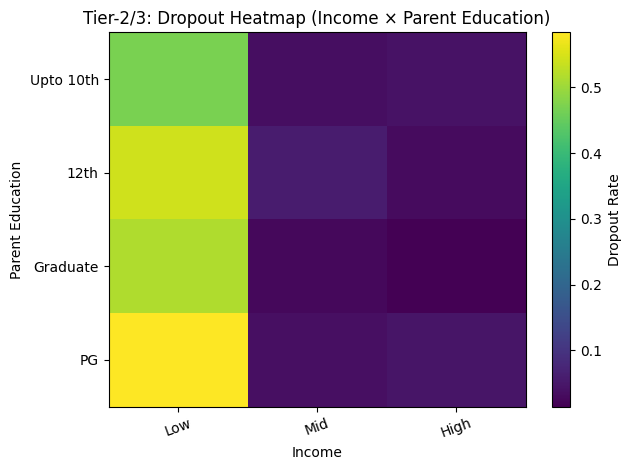

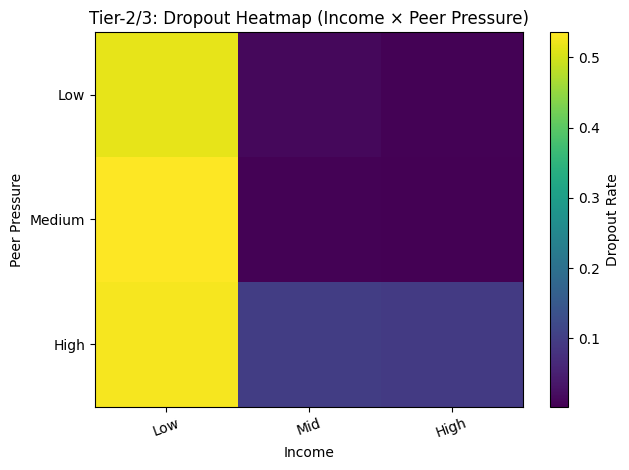

In [ ]:
# --- NEW Cell 5C: Tier-2/3 dropout heatmaps (Income x Parent Edu / Peer Pressure) ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t23 = df[df["tier_bucket"]=="Tier-2/3"].copy()

# Ordered axes
income_order = ["Low","Mid","High"]
parent_order = ["Upto 10th","12th","Graduate","PG"]
peer_order = ["Low","Medium","High"]

def heatmap_from_pivot(pvt, title, xt, yt):
    arr = pvt.reindex(index=yt, columns=xt).values
    plt.figure(figsize=(6.5,4.8))
    plt.imshow(arr, aspect="auto", interpolation="nearest")
    plt.title(title)
    plt.xlabel(pvt.columns.name or "X")
    plt.ylabel(pvt.index.name or "Y")
    plt.xticks(range(len(xt)), xt, rotation=20)
    plt.yticks(range(len(yt)), yt)
    plt.colorbar(label="Dropout Rate")
    plt.tight_layout()
    plt.show()

# Heatmap 1: Income x Parent Education
pvt1 = t23.pivot_table(index="parent_education", columns="family_income", values="dropout", aggfunc="mean")
pvt1.index.name = "Parent Education"; pvt1.columns.name = "Income"
heatmap_from_pivot(pvt1, "Tier-2/3: Dropout Heatmap (Income × Parent Education)", income_order, parent_order)

# Heatmap 2: Income x Peer Pressure
pvt2 = t23.pivot_table(index="peer_pressure_level", columns="family_income", values="dropout", aggfunc="mean")
pvt2.index.name = "Peer Pressure"; pvt2.columns.name = "Income"
heatmap_from_pivot(pvt2, "Tier-2/3: Dropout Heatmap (Income × Peer Pressure)", income_order, peer_order)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


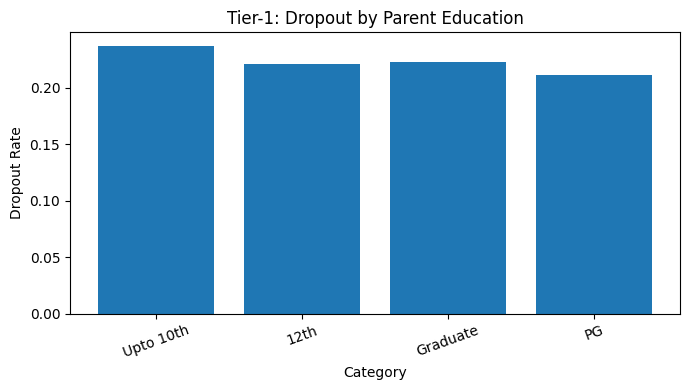

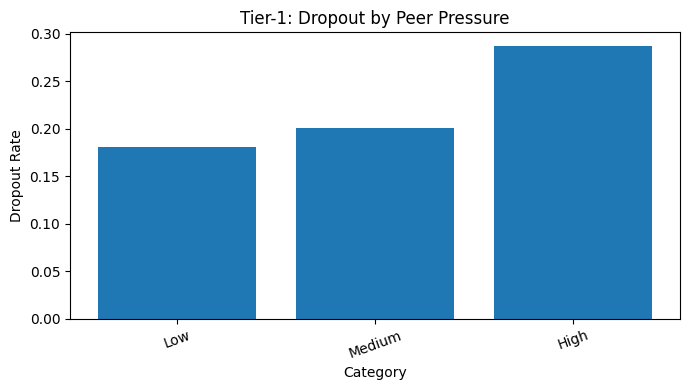

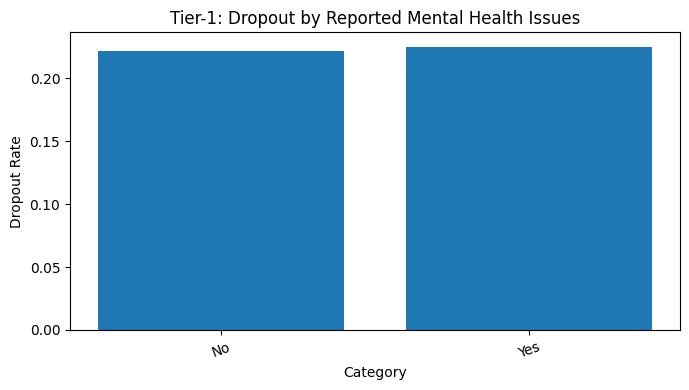

/tmp/ipython-input-3158968727.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_rates_t1 = t1.groupby("hours_bin")["dropout"].mean()


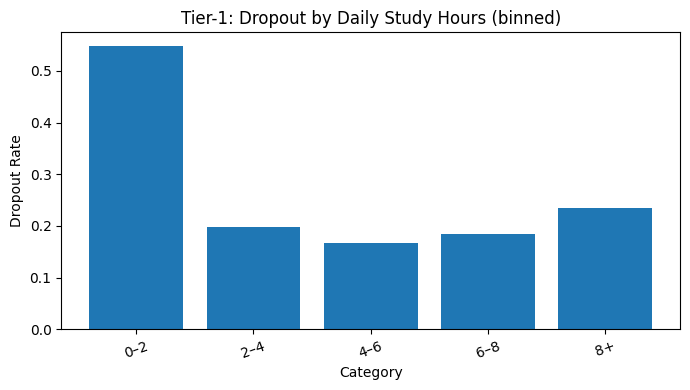

In [ ]:
# --- NEW Cell 5E: Tier-1 dropout reasons (bar charts) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure tier bucket exists
if "tier_bucket" not in df.columns:
    tier_map = {"Urban":"Tier-1","Semi-Urban":"Tier-2/3","Rural":"Tier-2/3"}
    df["tier_bucket"] = df["location_type"].map(tier_map)

t1 = df[df["tier_bucket"]=="Tier-1"].copy()

def plot_rate_bar(title, rates):
    plt.figure(figsize=(7,4))
    plt.bar(rates.index.astype(str), rates.values)
    plt.title(title)
    plt.xlabel("Category")
    plt.ylabel("Dropout Rate")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

# 1) Parent education
parent_order = ["Upto 10th","12th","Graduate","PG"]
p_rates_t1 = (t1.groupby("parent_education")["dropout"].mean()).reindex(parent_order)
plot_rate_bar("Tier-1: Dropout by Parent Education", p_rates_t1)

# 2) Peer pressure
peer_order = ["Low","Medium","High"]
peer_rates_t1 = (t1.groupby("peer_pressure_level")["dropout"].mean()).reindex(peer_order)
plot_rate_bar("Tier-1: Dropout by Peer Pressure", peer_rates_t1)

# 3) Mental health (Yes/No)
mh_order = ["No","Yes"]
mh_rates_t1 = (t1.groupby("mental_health_issues")["dropout"].mean()).reindex(mh_order)
plot_rate_bar("Tier-1: Dropout by Reported Mental Health Issues", mh_rates_t1)

# 4) Study-hours bins
bins = [0,2,4,6,8,24]
labels = ["0–2","2–4","4–6","6–8","8+"]
t1["hours_bin"] = pd.cut(t1["daily_study_hours"], bins=bins, labels=labels, include_lowest=True, right=False)
hours_rates_t1 = t1.groupby("hours_bin")["dropout"].mean()
plot_rate_bar("Tier-1: Dropout by Daily Study Hours (binned)", hours_rates_t1)


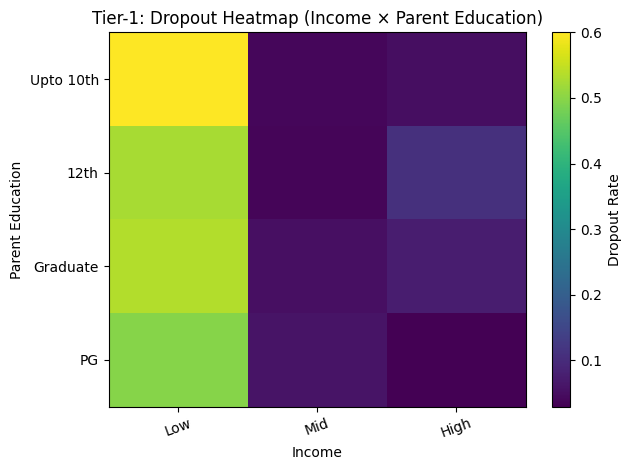

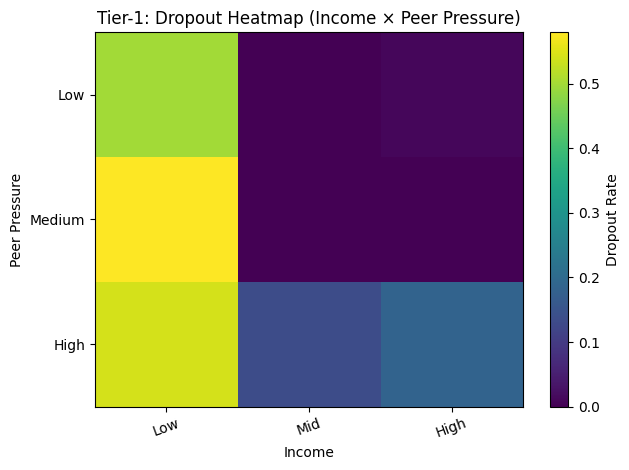

In [ ]:
# --- NEW Cell 5F: Tier-1 dropout heatmaps (Income × Parent Edu / Peer Pressure) ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t1 = df[df["tier_bucket"]=="Tier-1"].copy()

income_order = ["Low","Mid","High"]
parent_order = ["Upto 10th","12th","Graduate","PG"]
peer_order = ["Low","Medium","High"]

def heatmap_from_pivot(pvt, title, xt, yt):
    pvt = pvt.copy()
    pvt = pvt.reindex(index=yt, columns=xt)
    arr = pvt.values
    plt.figure(figsize=(6.5,4.8))
    plt.imshow(arr, aspect="auto", interpolation="nearest")
    plt.title(title)
    plt.xlabel(pvt.columns.name or "X")
    plt.ylabel(pvt.index.name or "Y")
    plt.xticks(range(len(xt)), xt, rotation=20)
    plt.yticks(range(len(yt)), yt)
    plt.colorbar(label="Dropout Rate")
    plt.tight_layout()
    plt.show()

# Heatmap 1: Income × Parent Education (Tier-1)
pvt1_t1 = t1.pivot_table(index="parent_education", columns="family_income",
                         values="dropout", aggfunc="mean")
pvt1_t1.index.name = "Parent Education"; pvt1_t1.columns.name = "Income"
heatmap_from_pivot(pvt1_t1, "Tier-1: Dropout Heatmap (Income × Parent Education)", income_order, parent_order)

# Heatmap 2: Income × Peer Pressure (Tier-1)
pvt2_t1 = t1.pivot_table(index="peer_pressure_level", columns="family_income",
                         values="dropout", aggfunc="mean")
pvt2_t1.index.name = "Peer Pressure"; pvt2_t1.columns.name = "Income"
heatmap_from_pivot(pvt2_t1, "Tier-1: Dropout Heatmap (Income × Peer Pressure)", income_order, peer_order)


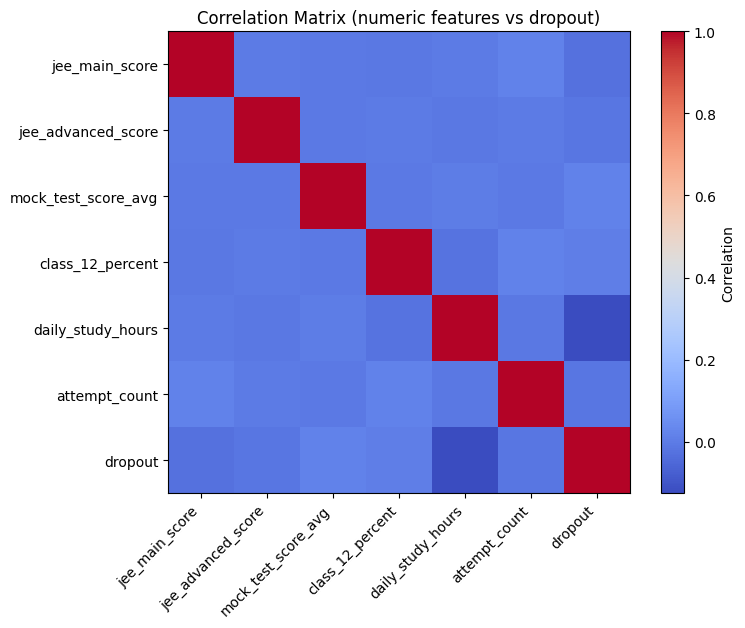

Correlation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# --- Cell (after 5): Correlation Matrix & Heatmap ---
import matplotlib.pyplot as plt

# Select numeric columns only (dropout is already numeric)
num_df = df[[
    "jee_main_score",
    "jee_advanced_score",
    "mock_test_score_avg",
    "class_12_percent",
    "daily_study_hours",
    "attempt_count",
    "dropout"
]]

# Compute correlations
corr = num_df.corr()

# Heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(label="Correlation")
plt.title("Correlation Matrix (numeric features vs dropout)")
plt.show()

# Print correlations with dropout sorted
print("Correlation")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
files.download("correlation_heatmap.png")



In [ ]:
# --- Cell 6: Simple TAM/SAM/SOM approximations (in-file proxy) ---
# TAM: all Tier-2/3 students in this dataset
tam = (df["tier_bucket"]=="Tier-2/3").sum()

# SAM: active prep proxy -> has non-zero mock_test_score_avg
sam = df[(df["tier_bucket"]=="Tier-2/3") & (df["mock_test_score_avg"]>0)].shape[0]

# SOM: affordability+effort -> Mid/High OR Low with >=3 hrs study
som = df[(df["tier_bucket"]=="Tier-2/3") & (
    (df["family_income"].isin(["Mid","High"])) |
    ((df["family_income"]=="Low") & (df["daily_study_hours"]>=3))
)].shape[0]

tam_sam_som = pd.DataFrame({
    "Metric":["TAM (Tier-2/3 students)","SAM (active prep proxy)","SOM (affordability+effort)"],
    "Count":[tam, sam, som]
})
tam_sam_som


,Metric,Count
0,TAM (Tier-2/3 students),3349
1,SAM (active prep proxy),3349
2,SOM (affordability+effort),3094


In [ ]:
# --- Cell 7: Logistic Regression for dropout risk ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

features = [
    "tier_bucket","family_income","parent_education","peer_pressure_level","mental_health_issues",
    "daily_study_hours","attempt_count","mock_test_score_avg","class_12_percent"
]
X = df[features].copy()
y = df["dropout"].astype(int)

cat = ["tier_bucket","family_income","parent_education","peer_pressure_level","mental_health_issues"]
num = ["daily_study_hours","attempt_count","mock_test_score_avg","class_12_percent"]

preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat),
    ("num", StandardScaler(), num)
])

log_reg = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", LogisticRegression(max_iter=200, solver="lbfgs"))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

log_reg.fit(X_train, y_train)
preds = log_reg.predict(X_test)
probs = log_reg.predict_proba(X_test)[:,1]

print("AUC:", round(roc_auc_score(y_test, probs), 3))
print("\nClassification Report:\n", classification_report(y_test, preds))


AUC: 0.876

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       991
           1       0.54      0.52      0.53       259

    accuracy                           0.81      1250
   macro avg       0.71      0.70      0.70      1250
weighted avg       0.81      0.81      0.81      1250



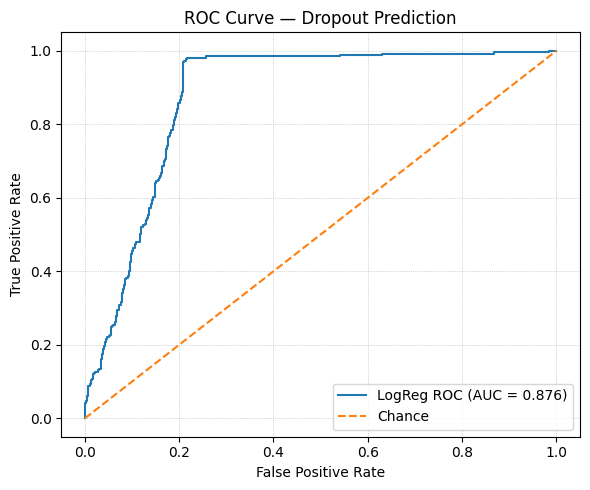

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best threshold (Youden J): 0.112 | TPR=0.981, FPR=0.217


In [ ]:
# --- New Cell 7B: ROC Curve for Dropout Model ---
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Use probs from previous cell; if missing, recompute
try:
    y_score = probs
except NameError:
    y_score = log_reg.predict_proba(X_test)[:, 1]

# ROC points and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"LogReg ROC (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Dropout Prediction")
plt.legend(loc="lower right")
plt.grid(True, linestyle=":", linewidth=0.5)
plt.tight_layout()

# Save + (optionally) download
plt.savefig("roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()
try:
    from google.colab import files
    files.download("roc_curve.png")
except Exception:
    pass

# Optional: pick a good threshold via Youden's J statistic
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_thresh = thresholds[best_idx]
print(f"Best threshold (Youden J): {best_thresh:.3f} | TPR={tpr[best_idx]:.3f}, FPR={fpr[best_idx]:.3f}")


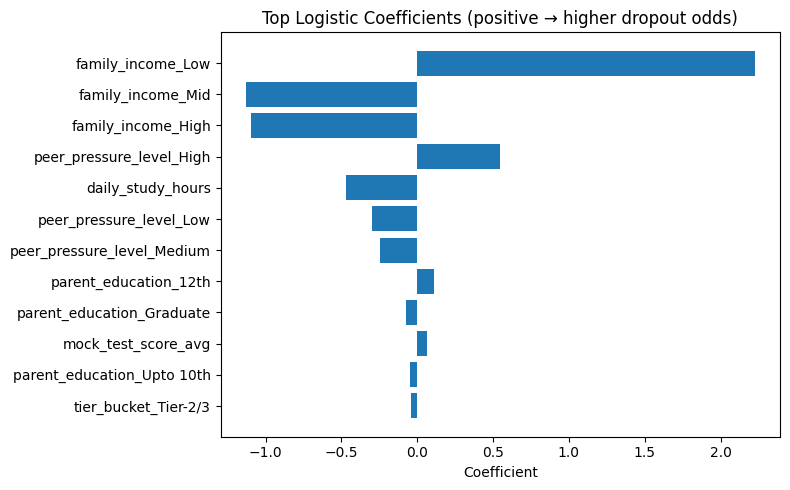

In [ ]:
# --- NEW Cell 7C: Top logistic coefficients (reason chart) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assumes you've already fit `log_reg` (Pipeline) in Cell 7
# If your pipeline is named differently, update below.
ohe = log_reg.named_steps["pre"].named_transformers_["cat"]
cat_feats = list(ohe.get_feature_names_out(["tier_bucket","family_income","parent_education","peer_pressure_level","mental_health_issues"]))
num_feats = ["daily_study_hours","attempt_count","mock_test_score_avg","class_12_percent"]
all_feats = cat_feats + num_feats

coefs = log_reg.named_steps["clf"].coef_.ravel()
coef_df = pd.DataFrame({"feature": all_feats, "coef": coefs})
coef_df["abs"] = coef_df["coef"].abs()
top = coef_df.sort_values("abs", ascending=False).head(12).iloc[::-1]  # smallest at top in plot

plt.figure(figsize=(8,5))
plt.barh(top["feature"], top["coef"])
plt.title("Top Logistic Coefficients (positive → higher dropout odds)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()


In [ ]:
# --- Cell 8: Which features drive dropout (coef view) ---
# Pull the fitted OneHotEncoder to recover names
ohe = log_reg.named_steps["pre"].named_transformers_["cat"]
ohe_features = list(ohe.get_feature_names_out(cat))
num_features = num
all_features = ohe_features + num_features

coefs = log_reg.named_steps["clf"].coef_.ravel()
coef_df = pd.DataFrame({"feature": all_features, "coef": coefs}).sort_values("coef", ascending=False)

print("Top features that INCREASE dropout odds:")
display(coef_df.head(10))

print("\nTop features that DECREASE dropout odds:")
display(coef_df.tail(10))


Top features that INCREASE dropout odds:


,feature,coef
3,family_income_Low,2.224424
9,peer_pressure_level_High,0.548171
5,parent_education_12th,0.107992
16,mock_test_score_avg,0.065923
0,tier_bucket_Tier-1,0.038849
13,mental_health_issues_Yes,0.034231
17,class_12_percent,0.033918
7,parent_education_PG,0.017088
15,attempt_count,-0.013238
12,mental_health_issues_No,-0.034765



Top features that DECREASE dropout odds:


,feature,coef
15,attempt_count,-0.013238
12,mental_health_issues_No,-0.034765
1,tier_bucket_Tier-2/3,-0.039383
8,parent_education_Upto 10th,-0.050616
6,parent_education_Graduate,-0.074998
11,peer_pressure_level_Medium,-0.248211
10,peer_pressure_level_Low,-0.300494
14,daily_study_hours,-0.471050
2,family_income_High,-1.096569
4,family_income_Mid,-1.128389


In [ ]:
# --- Cell 9: KMeans clusters for GTM segmentation ---
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

cluster_cols = ["tier_bucket","family_income","peer_pressure_level","daily_study_hours","mock_test_score_avg"]
clust_df = df[cluster_cols].copy()

cat_c = ["tier_bucket","family_income","peer_pressure_level"]
num_c = ["daily_study_hours","mock_test_score_avg"]

# Handle sklearn version differences: sparse_output vs sparse
try:
    enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
except TypeError:
    enc = OneHotEncoder(sparse=False, handle_unknown="ignore")

scaled = StandardScaler()

X_cat = enc.fit_transform(clust_df[cat_c])
X_num = scaled.fit_transform(clust_df[num_c])
X_clust = np.hstack([X_cat, X_num])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_clust)

clust_df["cluster"] = labels

# Summaries
summary = clust_df.groupby("cluster").agg(
    avg_study_hours=("daily_study_hours","mean"),
    avg_mock_score=("mock_test_score_avg","mean")
).reset_index()

dist_tier = pd.crosstab(clust_df["cluster"], clust_df["tier_bucket"], normalize="index").reset_index()
dist_income = pd.crosstab(clust_df["cluster"], clust_df["family_income"], normalize="index").reset_index()
dist_peer = pd.crosstab(clust_df["cluster"], clust_df["peer_pressure_level"], normalize="index").reset_index()

summary, dist_tier, dist_income, dist_peer


(   cluster  avg_study_hours  avg_mock_score
 0        0         2.695550       74.205869
 1        1         6.308262       74.535304
 2        2         4.466706       55.862986,
 tier_bucket  cluster    Tier-1  Tier-2/3
 0                  0  0.327721  0.672279
 1                  1  0.306804  0.693196
 2                  2  0.355411  0.644589,
 family_income  cluster      High       Low       Mid
 0                    0  0.340349  0.320505  0.339146
 1                    1  0.326853  0.348724  0.324423
 2                    2  0.330574  0.338261  0.331165,
 peer_pressure_level  cluster      High       Low    Medium
 0                          0  0.339747  0.310283  0.349970
 1                          1  0.331106  0.329891  0.339004
 2                          2  0.333530  0.350680  0.315789)

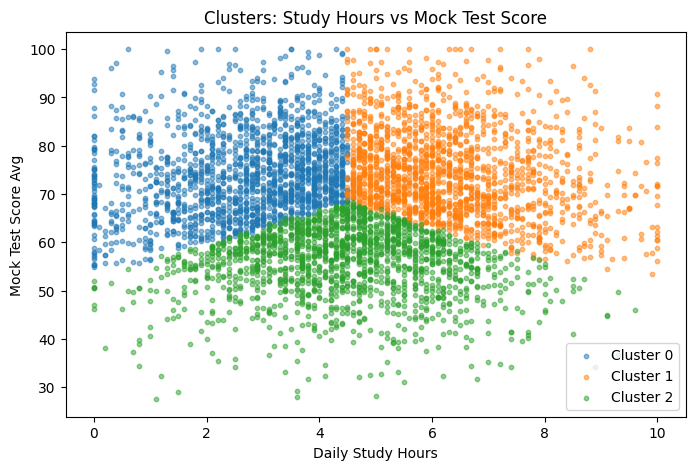

Cluster Profiles (means + dropout rate):



,cluster,avg_study_hours,avg_mock_score,dropout_rate
0,0,2.695550,74.205869,0.248346
1,1,6.308262,74.535304,0.184690
2,2,4.466706,55.862986,0.188646


Cluster 0: avg study=2.70h, avg mock=74.21, dropout_rate=0.248
Cluster 1: avg study=6.31h, avg mock=74.54, dropout_rate=0.185
Cluster 2: avg study=4.47h, avg mock=55.86, dropout_rate=0.189


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# --- Cell 10: Visualize clusters + link to GTM actions ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for c in sorted(clust_df["cluster"].unique()):
    sub = clust_df[clust_df["cluster"]==c]
    plt.scatter(sub["daily_study_hours"], sub["mock_test_score_avg"], s=10, alpha=0.5, label=f"Cluster {c}")
plt.title("Clusters: Study Hours vs Mock Test Score")
plt.xlabel("Daily Study Hours")
plt.ylabel("Mock Test Score Avg")
plt.legend()
plt.show()

# Join dropout for each cluster to understand risk levels
cluster_dropout = df.join(clust_df["cluster"]) \
                    .groupby("cluster")["dropout"].mean() \
                    .rename("dropout_rate").reset_index()

final_profile = summary.merge(cluster_dropout, on="cluster", how="left")
print("Cluster Profiles (means + dropout rate):\n")
display(final_profile)

# Short textual notes you can paste into your PPT/Report
for _, row in final_profile.iterrows():
    print(f"Cluster {int(row['cluster'])}: "
          f"avg study={row['avg_study_hours']:.2f}h, "
          f"avg mock={row['avg_mock_score']:.2f}, "
          f"dropout_rate={row['dropout_rate']:.3f}")
plt.savefig("clusters.png", dpi=300, bbox_inches="tight")
files.download("clusters.png")